# Fetal health classification

Classifying fetal health in order to prevent child and maternal mortality.

United Nation's Sustainable Development Goals reflect that reduction of child mortality is an indicator of human progress. This concept also includes maternal mortality.

Most of the accounted losses have occured in regions of low-resource and coul dhave been prevented.

Cardiotocography (CTG) is the means of measuring the fetal heart rate, movements and uterine contractions, thus continuously monitoring the health of the mother and child. The equipment used to perform the monitoring is called cardiotocograph and work using ultrasound pulses. This is a simple and cost effictive solution to assessing the fetal health, thus allowing professionals to take neccessary action.

In [1]:
import pandas as pd
import numpy as np
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

## Dataset

> Citation
> Ayres de Campos et al. (2000) SisPorto 2.0 [A Program for Automated Analysis of Cardiotocograms](https://onlinelibrary.wiley.com/doi/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9). J Matern Fetal Med 5:311-318

The dataset has 2126 samples containing features extracted from cardiotocogram exams.

The data was labelled by expert obstetritians into 3 classes.

In [2]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/AyishaR0/fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
# Here are the class labels according to the metadata

class_names = ['Normal', 'Suspect', 'Pathological']

In [4]:
# Lets see the spread of values across classes

df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

This is a heavily unbalanced.

In order to balance the dataset, there are two options,
* upsampling - resample the values to make their count equal to the class label with the higher count (here, 1655).
* downsampling - pick n samples from each class label where n = number of samples in class with least count (here, 176)

Here, we will be upsampling.

In [5]:
# separating into 3 dataframes, one for each class 

df1 = df[df['fetal_health'] == 1.0]
df2 = df[df['fetal_health'] == 2.0]
df3 = df[df['fetal_health'] == 3.0]

In [6]:
print("Number of samples in:")
print("Class label 1 - ", len(df1))
print("Class label 2 - ", len(df2))
print("Class label 3 - ", len(df3))

# Upsampling 

df2 = df2.sample(len(df1), replace = True)    # replace = True enables resampling
df3 = df3.sample(len(df1), replace = True)

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 1 - ", len(df1))
print("Class label 2 - ", len(df2))
print("Class label 3 - ", len(df3))

Number of samples in:
Class label 1 -  1655
Class label 2 -  295
Class label 3 -  176

After resampling - 
Number of samples in:
Class label 1 -  1655
Class label 2 -  1655
Class label 3 -  1655


In [7]:
# concatente to form a single dataframe

dfx = df1.append(df2).append(df3)

print('Total number of samples - ', len(dfx))

Total number of samples -  4965


## Preprocessing

### One hot encoding

In [8]:
# Defining input and output columns

inputc = dfx.columns[:-1]
outputc = [1, 2, 3]    # to be used after one hot encoding

print("Input columns - ", list(inputc))
print("\nOutput columns - ", outputc)

Input columns -  ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']

Output columns -  [1, 2, 3]


SInce this is a classification problem, the output of the model which is now as an integer should be one-hot encoded.

In [9]:
y = pd.get_dummies(dfx.fetal_health)

y

,1.0,2.0,3.0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
12,1,0,0
...,...,...,...
720,0,0,1
22,0,0,1
54,0,0,1
698,0,0,1


In [10]:
# adding as columns to the dataframe

for x in outputc:
    dfx[x] = y[x]
    
dfx    

# as said before, the output columns are labelled 1, 2, 3

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,1,2,3
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,1.0,1,0,0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,1.0,1,0,0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,1.0,1,0,0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,1.0,1,0,0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.000,28.0,1.4,0.0,...,0.0,135.0,134.0,137.0,7.0,1.0,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,129.0,0.000,0.007,0.004,0.000,0.0,0.000,65.0,0.4,73.0,...,0.0,131.0,130.0,132.0,0.0,0.0,3.0,0,0,1
22,128.0,0.000,0.334,0.003,0.003,0.0,0.003,34.0,2.5,0.0,...,1.0,75.0,99.0,102.0,148.0,-1.0,3.0,0,0,1
54,148.0,0.000,0.003,0.000,0.000,0.0,0.000,70.0,0.3,69.0,...,0.0,150.0,148.0,150.0,0.0,1.0,3.0,0,0,1
698,131.0,0.000,0.335,0.003,0.003,0.0,0.002,34.0,2.2,0.0,...,1.0,75.0,99.0,102.0,148.0,-1.0,3.0,0,0,1


### Train test split

In [11]:
# Splitting into train and test using 80-20 split

traindf, testdf = train_test_split(dfx.sample(frac=1), test_size = 0.2)    # shuffling the dataframe before splitting

print('Number of samples in:')
print('Train set - ' , len(traindf))
print('Test set - ', len(testdf))

Number of samples in:
Train set -  3972
Test set -  993


In [12]:
# Splitting into X and y arrays for preprocessing purposes

Xtrain, ytrain = traindf[inputc], traindf[outputc]
Xtest, ytest = testdf[inputc], testdf[outputc]

### Scaling the values

In [13]:
# Each feature has a different range. 
# Using min_max_scaler to scale them to values in the range [0,1].

min_max_scaler = MinMaxScaler()

# Fit on training set alone
Xtrain = min_max_scaler.fit_transform(Xtrain)

# Use it to transform val and test input
Xtest = min_max_scaler.transform(Xtest)

## The model

In [14]:
model = Sequential([
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(3, activation = 'softmax'),
])

In [15]:
# training with a learning rate of 0.01

model.compile(optimizer = Adam(0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history1 = model.fit(Xtrain, ytrain, validation_data= (Xtest, ytest), epochs = 64)

Epoch 1/64
125/125 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7996 - val_loss: 0.3529 - val_accuracy: 0.8590
Epoch 2/64
125/125 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8535 - val_loss: 0.3009 - val_accuracy: 0.8781
Epoch 3/64
125/125 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8713 - val_loss: 0.3266 - val_accuracy: 0.8741
Epoch 4/64
125/125 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8895 - val_loss: 0.2485 - val_accuracy: 0.8953
Epoch 5/64
125/125 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8955 - val_loss: 0.2619 - val_accuracy: 0.8771
Epoch 6/64
125/125 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9071 - val_loss: 0.3064 - val_accuracy: 0.8912
Epoch 7/64
125/125 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.9026 - val_loss: 0.2052 - val_accuracy: 0.9225
Epoch 

In [16]:
# training with learning rate of 0.001

model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history2 = model.fit(Xtrain, ytrain, validation_data= (Xtest, ytest), epochs = 64)

Epoch 1/64
125/125 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.1001 - val_accuracy: 0.9778
Epoch 2/64
125/125 [==============================] - 0s 1ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.0973 - val_accuracy: 0.9789
Epoch 3/64
125/125 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9882 - val_loss: 0.0921 - val_accuracy: 0.9789
Epoch 4/64
125/125 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9877 - val_loss: 0.0981 - val_accuracy: 0.9768
Epoch 5/64
125/125 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9894 - val_loss: 0.0985 - val_accuracy: 0.9768
Epoch 6/64
125/125 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9897 - val_loss: 0.0912 - val_accuracy: 0.9819
Epoch 7/64
125/125 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 0.9902 - val_loss: 0.0910 - val_accuracy: 0.9789
Epoch 

In [17]:
model.evaluate(Xtest, ytest)

32/32 [==============================] - 0s 699us/step - loss: 0.1179 - accuracy: 0.9778


[0.1178666353225708, 0.9778448939323425]

## Plotting the metrics

In [18]:
def plot(history1, history2, variable1, variable2):
    # combining metrics from both trainings    
    var1_history = history1[variable1]
    var1_history.extend(history2[variable1])
    
    var2_history = history1[variable2]
    var2_history.extend(history2[variable2])
    
    # plotting them
    plt.plot(range(len(var1_history)), var1_history)
    plt.plot(range(len(var2_history)), var2_history)
    plt.legend([variable1, variable2])
    plt.title(variable1)

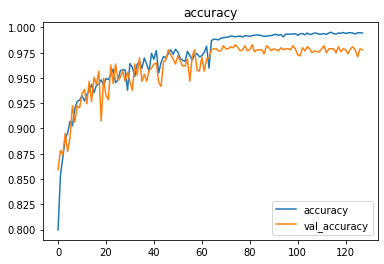

In [19]:
plot(history1.history, history2.history, "accuracy", 'val_accuracy')

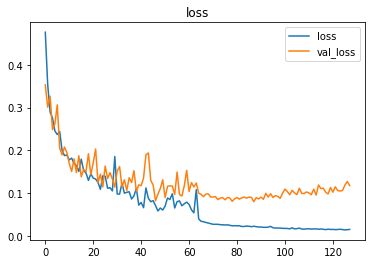

In [20]:
plot(history1.history, history2.history, "loss", 'val_loss')

## Prediction

In [21]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

output = model.predict(Xtest[x].reshape(1, -1))    # getting output; input shape (256, 256, 3) --> (1, 256, 256, 3)
pred = np.argmax(output[0])    # finding max
print("Prdicted: ", class_names[pred])    # Picking the label from class_names base don the model output

output_true = np.array(ytest)[x]

print("True: ", class_names[np.argmax(output_true)])
print("Probability: ", output[0][pred])

Prdicted:  Suspect
True:  Suspect
Probability:  0.99999666


## deepC

In [22]:
model.save('fetal_health.h5')

!deepCC fetal_health.h5

reading [keras model] from 'fetal_health.h5'
Saved 'fetal_health.onnx'
reading onnx model from file  fetal_health.onnx
Model info:
  ir_vesion :  4 
  doc       : 
WARN (ONNX): terminal (input/output) dense_input's shape is less than 1.
             changing it to 1.
WARN (ONNX): terminal (input/output) dense_2's shape is less than 1.
             changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_2) as io node.
running DNNC graph sanity check ... passed.
Writing C++ file  fetal_health_deepC/fetal_health.cpp
INFO (ONNX): model files are ready in dir fetal_health_deepC
g++ -std=c++11 -O3 -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 fetal_health_deepC/fetal_health.cpp -o fetal_health_deepC/fetal_health.exe
Model executable  fetal_health_deepC/fetal_health.exe


In [29]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

np.savetxt('sample.data', Xtest[x])    # xth sample into text file

# run exe with input
!fetal_health_deepC/fetal_health.exe sample.data

# show predicted output
nn_out = np.loadtxt('dense_2.out')

pred = np.argmax(nn_out)    # finding max
print("Prdicted: ", class_names[pred])    # Picking the label from class_names base don the model output

output_true = np.array(ytest)[x]

print("True: ", class_names[np.argmax(output_true)])
print("Probability: ", nn_out[pred])

reading file sample.data.
writing file dense_2.out.
Prdicted:  Suspect
True:  Suspect
Probability:  0.963821
